In [48]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

#deafault prediction models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [14]:
def load_dataset(name):
    try:
        dataset = pd.read_csv('datasets/{}'.format(name))
        return dataset
    except Exception as err:
        print(type(err))    
        print(err.args)     
        print(inst)
        print("An exception occurred")
        return None

In [18]:
dataset = load_dataset('news_popularity.csv')

In [19]:
def dataset_head(dataset):
    print('This shows the top 5 fields of a dataset')
    return dataset.head()

In [20]:
def dataset_tail(dataset):
    print('This shows the bottom 5 fields of a dataset')
    return dataset.tail()

In [22]:
def dataset_shape(dataset):
    print('This shows the dimensions of a dataset')
    return dataset.shape

In [23]:
def dataset_info(dataset):
    print('This shows the datatypes and count of empty fields for each column of a dataset')
    return dataset.info()

In [24]:
def dataset_stats(dataset):
    print('This shows the basic statistics of numerical columns/feature of a dataset')
    return dataset.describe()

In [25]:
def understand_dataset(dataset):
    print(dataset_head(dataset))
    print(dataset_tail(dataset))
    print(dataset_shape(dataset))
    print(dataset_info(dataset))
    print(dataset_stats(dataset))
    

In [27]:
understand_dataset(dataset)

This shows the top 5 fields of a dataset
                                                 url  timedelta  \
0  http://mashable.com/2013/08/04/google-glass-pw...      522.0   
1  http://mashable.com/2014/07/13/buzz-aldrin-tys...      179.0   
2  http://mashable.com/2014/01/01/20-songs-turnin...      372.0   
3  http://mashable.com/2013/12/13/marissa-mayer-o...      391.0   
4  http://mashable.com/2013/02/08/mashtags-webrea...      699.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             8.0             225.0         0.623762               1.0   
1             9.0             779.0         0.476864               1.0   
2            11.0            1713.0         0.363748               1.0   
3            14.0            1262.0         0.434963               1.0   
4             7.0             345.0         0.664537               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815534        4.0

In [28]:
def show_columns(dataset):
    print(dataset.columns.values.tolist())

In [29]:
show_columns(dataset)

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', '

In [30]:
def show_column(dataset, column):
    print(dataset[column].describe)

In [40]:
def column_type(dataset, column):
    return dataset[column].dtype.type

In [44]:
column_type(dataset, 'shares')

numpy.int64

In [43]:
def is_ready_for_plot(dataset, column, force=False):
    if dataset[column].isna() and not force:
        return 'Cannot plot a column with some missing values. Please remove the missing values, or use force to plot'
    elif dataset[column].isna() and force:
        drop_na(dataset, column)
        return True
    else:
        return True


In [ ]:
def is_compatible_with_graph(dataset, column, graph):
    if graph is in ['Box-and-whisker', 'Histograms','Scatter Plot']:
        if column_type(dataset, column) is in ['numpy.float64', 'numpy.int64']:
            return True
        else: return False
    elif graph is 'Time Series':
        return False

In [ ]:
def fill_na(dataset, method,  column=None, columns=None):
    if (column is None and columns is None):
        dataset = dataset.fillna(method=method)

In [ ]:
def drop_na(dataset, column, axis='rows'):
    dataset = dataset[column].drop_na()

In [46]:
def label_encode(dataset, columns):
    label_encoder = LabelEncoder()
    for each in columns:
        dataset[each] = label_encoder.fit_transform(dataset[each].astype('str'))

In [59]:
def correlation_graph(dataset, columns=None):
    if columns == None:
        columns = dataset.columns.values.tolist()
    plt.figure(figsize=(12,10))
    cor = dataset[columns].corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
    plt.show()

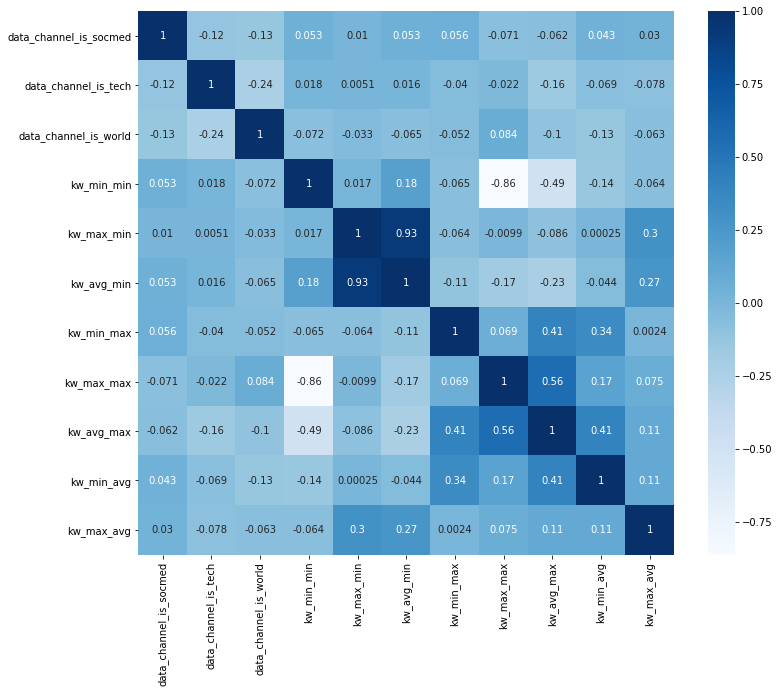

In [61]:
correlation_graph(dataset, ['data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg'])
# correlation_graph(dataset)

# UI